<a href="https://colab.research.google.com/github/Varma904/csdproject/blob/main/engineering_placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
df=pd.read_csv("collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


# Data Preprocess

In [ ]:
df.shape

(2966, 8)

In [ ]:
df.head(5)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [ ]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


# changing gender column into numerical

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
print(df)

      Age  Gender                         Stream  Internships  CGPA  Hostel  \
0      22       1  Electronics And Communication            1     8       1   
1      21       0               Computer Science            0     7       1   
2      22       0         Information Technology            1     6       0   
3      21       1         Information Technology            0     8       0   
4      22       1                     Mechanical            0     8       1   
...   ...     ...                            ...          ...   ...     ...   
2961   23       1         Information Technology            0     7       0   
2962   23       1                     Mechanical            1     7       1   
2963   22       1         Information Technology            1     7       0   
2964   22       1               Computer Science            1     7       0   
2965   23       1                          Civil            0     8       0   

      HistoryOfBacklogs  PlacedOrNot  
0           

In [ ]:
Stream_mapping = {
    'Electronics And Communication': 0,
    'Computer Science': 1,
    'Mechanical': 2,
    'Civil': 3,
    'Information Technology': 4,
    'Electrical': 5
}

df['Stream'] = df['Stream'].map(Stream_mapping)
print(df)


      Age  Gender  Stream  Internships  CGPA  Hostel  HistoryOfBacklogs  \
0      22       1       0            1     8       1                  1   
1      21       0       1            0     7       1                  1   
2      22       0       4            1     6       0                  0   
3      21       1       4            0     8       0                  1   
4      22       1       2            0     8       1                  0   
...   ...     ...     ...          ...   ...     ...                ...   
2961   23       1       4            0     7       0                  0   
2962   23       1       2            1     7       1                  0   
2963   22       1       4            1     7       0                  0   
2964   22       1       1            1     7       0                  0   
2965   23       1       3            0     8       0                  0   

      PlacedOrNot  
0               1  
1               1  
2               1  
3               1  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2966 non-null   int64
 1   Gender             2966 non-null   int64
 2   Stream             2966 non-null   int64
 3   Internships        2966 non-null   int64
 4   CGPA               2966 non-null   int64
 5   Hostel             2966 non-null   int64
 6   HistoryOfBacklogs  2966 non-null   int64
 7   PlacedOrNot        2966 non-null   int64
dtypes: int64(8)
memory usage: 185.5 KB


In [ ]:
df.count()

Age                  2966
Gender               2966
Stream               2966
Internships          2966
CGPA                 2966
Hostel               2966
HistoryOfBacklogs    2966
PlacedOrNot          2966
dtype: int64

In [ ]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [ ]:
df.dtypes

Age                  int64
Gender               int64
Stream               int64
Internships          int64
CGPA                 int64
Hostel               int64
HistoryOfBacklogs    int64
PlacedOrNot          int64
dtype: object

In [ ]:
df.isnull()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2961,False,False,False,False,False,False,False,False
2962,False,False,False,False,False,False,False,False
2963,False,False,False,False,False,False,False,False
2964,False,False,False,False,False,False,False,False


# Data Visulization

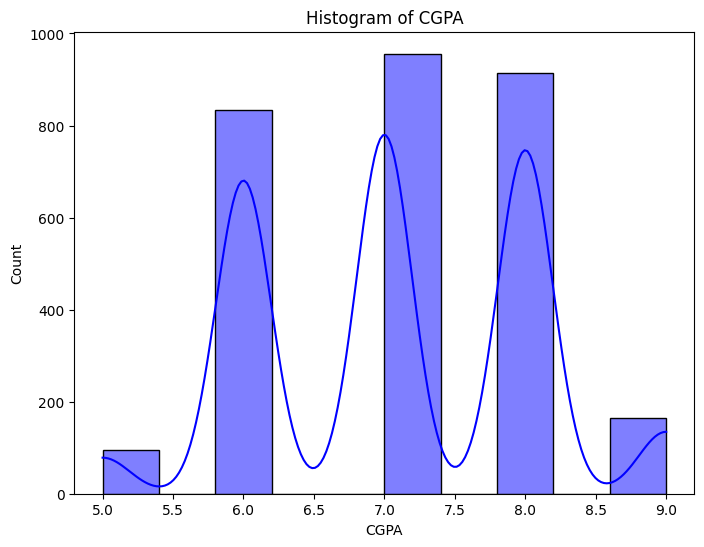

In [ ]:
# Visualization - Histogram for 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(df['CGPA'], bins=10, kde=True, color='blue')
plt.xlabel('CGPA')
plt.title('Histogram of CGPA')
plt.show()

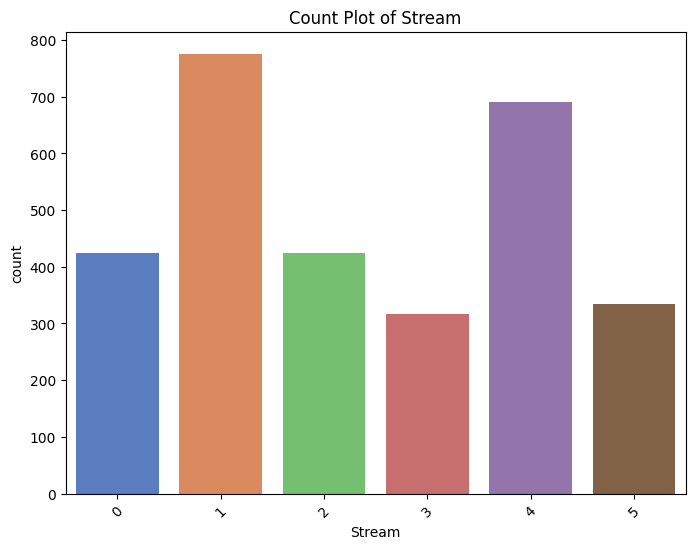

In [ ]:
# Visualization - Bar Plot for 'Stream'
plt.figure(figsize=(8, 6))
sns.countplot(x='Stream', data=df, palette='muted')
plt.title('Count Plot of Stream')
plt.xticks(rotation=45)
plt.show()

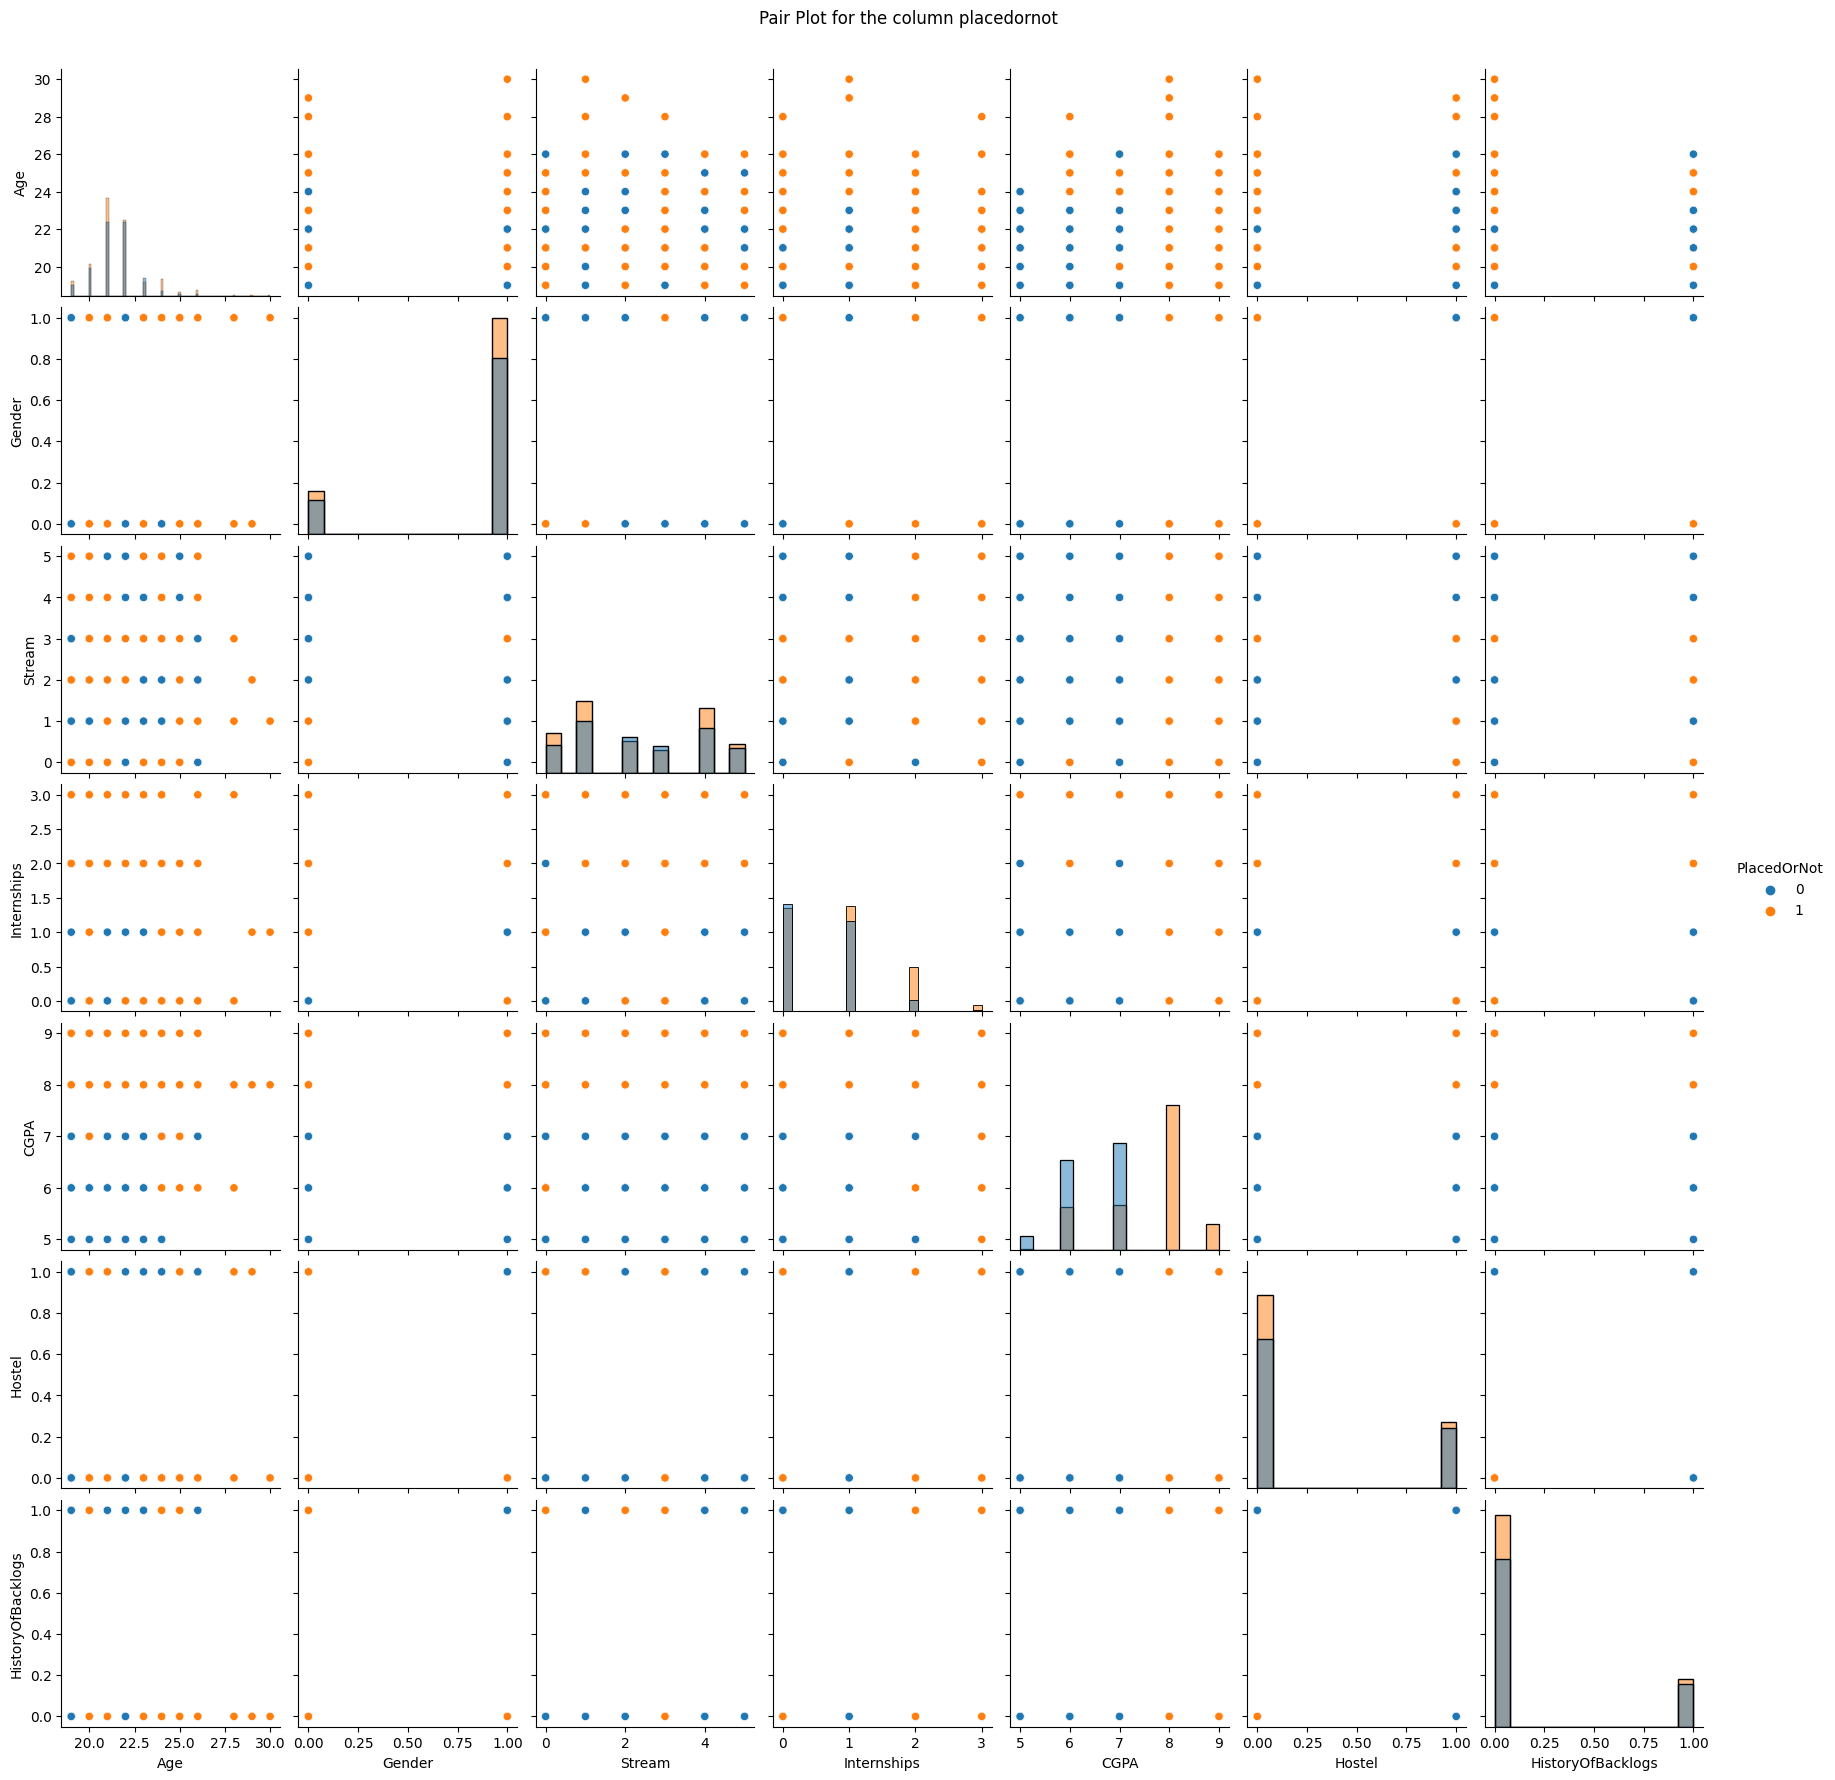

In [ ]:
# Visualization - Pair Plot
sns.pairplot(df, hue='PlacedOrNot', diag_kind='hist')
plt.suptitle('Pair Plot for the column placedornot', y=1.02)
plt.show()

# Model Selection

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop('PlacedOrNot', axis=1)
y = df['PlacedOrNot']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Model Selection: Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model using metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Model Evaluation:
Accuracy: 0.7676767676767676
Precision: 0.7813411078717201
Recall: 0.8096676737160121
F1-score: 0.7952522255192876


# KFold Cross validation

In [ ]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Initialize K-Fold Cross-Validation with k=5 (you can adjust k as needed)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store accuracy for each fold
accuracies = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    # Split data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy for this fold and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calculate the mean accuracy across all folds
mean_accuracy= sum(accuracies) / len(accuracies)
print("Mean Accuracy:", mean_accuracy)


Mean Accuracy: 0.7680384930384931


# Stratified KFold Cross validation

In [ ]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Initialize Stratified K-Fold Cross-Validation with k=5 (you can adjust k as needed)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store accuracy for each fold
accuracies = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(X, y):
    # Split data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy for this fold and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calculate the mean accuracy across all folds
mean_accuracy = sum(accuracies) / len(accuracies)
print("Mean Accuracy (Stratified K-Fold):", mean_accuracy)

Mean Accuracy (Stratified K-Fold): 0.770061491815286


# leave-one-out cross vaildation (LOOCV)

In [ ]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Initialize Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()

# Lists to store accuracy for each fold
accuracies = []

# Perform LOOCV
for train_index, test_index in loo.split(X):
    # Split data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy for this fold and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calculate the mean accuracy across all folds
mean_accuracy = sum(accuracies) / len(accuracies)
print("Mean Accuracy (LOOCV):", mean_accuracy)

Mean Accuracy (LOOCV): 0.7697235333782873


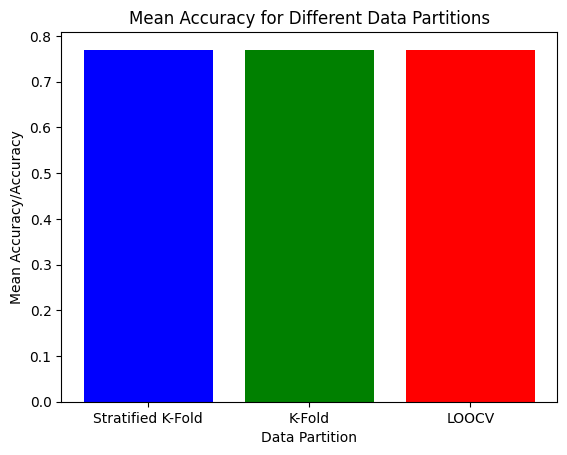

In [ ]:
# Create a bar plot to show the mean accuracies for each data partition
data_partitions = ['Stratified K-Fold', 'K-Fold', 'LOOCV']
mean_accuracies = [mean_accuracy, mean_accuracy, mean_accuracy]
colors = ['blue', 'green', 'red']
plt.bar(data_partitions, mean_accuracies,color=colors)
plt.xlabel('Data Partition')
plt.ylabel('Mean Accuracy/Accuracy')
plt.title('Mean Accuracy for Different Data Partitions')
plt.show()